# TAREA para el viernes:

1. Modificar el step size/learning rate y ver que pasa.
2. Graficar theta_0 vs theta_1, y ver como se mueve el punto en el plano (mostrar con colores, flechas, etc. el movimiento)
3. Simular y ajustar/learn los parametros del modelo (https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics): 
$$ f(x, \theta_0, \theta_1) = y = \dfrac{\theta_0  x}{(\theta_1 + x)} + \epsilon $$

Enviar el codigo con comentarios. Subir la tarea a su cuenta de GIT y me envian el link.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

1) Cuando el learning rate o step size es muy cercana a 1, por ejemplo valores para rho como 0.9 o 0.5, en la gráfica podemos observar que el algoritmo como tal no aprende (no converge). Es como el ejemplo visto en clases que no se llega a una solución y la función "choca con las paredes". En caso de elegir un learning rate de 0.3 ocurre lo mismo, pero al final si converge, lo que podría decir que se demora en encontrar la solución o en aprender.

3) Simular y ajustar/learn los parámetros del modelo Michaelis-Menten

In [26]:
def y_hat(theta_0, theta_1, x):
    p = ((theta_0 * x) / (theta_1 + x)) + 0.01
    return(p)

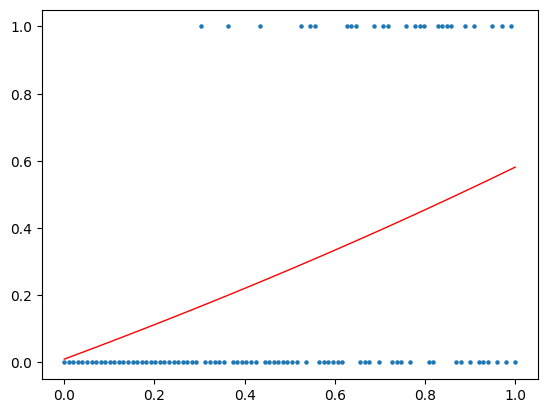

In [27]:
# Simulemos 100 datos para nuestra regression logistica
n = 100

# Definamos los parametros theta_0 "intercepto' y theta_1 "pendiente"
theta_0, theta_1 = [4, 8]

# Simular los datos x1, y
# Grilla de valores para nuestra covariable
x1 = np.linspace(0, 1, n)

# Esta funcion describe la probabilidad (p) que la observacion x sea 0 o 1.
y = np.random.binomial(1, y_hat(theta_0, theta_1, x1), n)

# Graficamos
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, -8, x1), color='red', linewidth = 1)

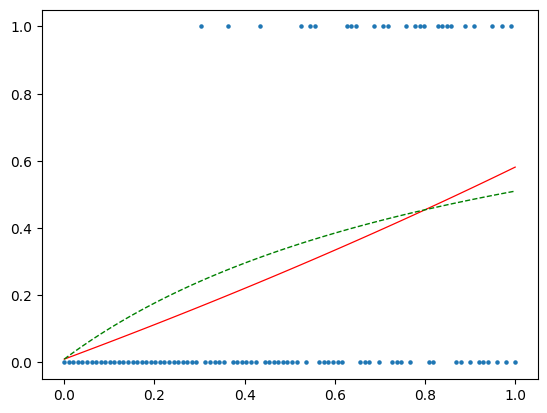

In [28]:
# Ahora vamos a realizar un SGD para estimar los parametros theta.
# Inicializar parametros
t0 = 1
t1 = 1

plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(-4, -8, x1), color='red', linewidth = .9)
# La curva en verde es la curva estimada con los parametros inicializados (no aprendidos aun)
plt.plot(x1, y_hat(t0, t1, x1), color= 'green', linewidth= 1, linestyle= '--')

In [29]:
# Definimos nuestra Loss function
def loss_fun(Y, X, t0, t1):
    loss = -1/n * np.sum(Y * np.log(y_hat(t0, t1, X)) + (1 - Y) * np.log(1 - y_hat(t0, t1, X)))
    return(loss)

# Obtenemos la cantidad error que cometemos
loss_ini = loss_fun(y, x1, t0, t1)
print("LOSS inicial:", loss_ini)

LOSS inicial: 0.48313843721650646


In [30]:
# Llevamos registro del error y los parametros
error = []
error.append(loss_ini)

t0_hat = []
t1_hat = []

t0_hat.append(t0)
t1_hat.append(t1)

In [31]:
# Gradient descent
def delta_theta_0(y, x1, t0, t1):
    delta_0 = np.sum((y_hat(t0, t1, x1) - y))
    return(delta_0)

def delta_theta_1(y, x1, t0, t1):
    delta_1 = np.sum((y_hat(t0, t1, x1) - y) * x1)
    return(delta_1)

# Step size o learnig rate
rho = 0.01

In [32]:
t0 -= rho * delta_theta_0(y, x1, t0, t1)
t1 -= rho * delta_theta_1(y, x1, t0, t1)

t0_hat.append(t0)
t1_hat.append(t1)

loss = loss_fun(y, x1, t0, t1)
error.append(loss)


print(t0_hat, t1_hat, error, sep='\n')

[1, 0.9337220218051466]
[1, 0.9936124316268672]
[0.48313843721650646, 0.47896762639584856]


Text(0.5, 1.0, 'Loss en funcion del Epoch')

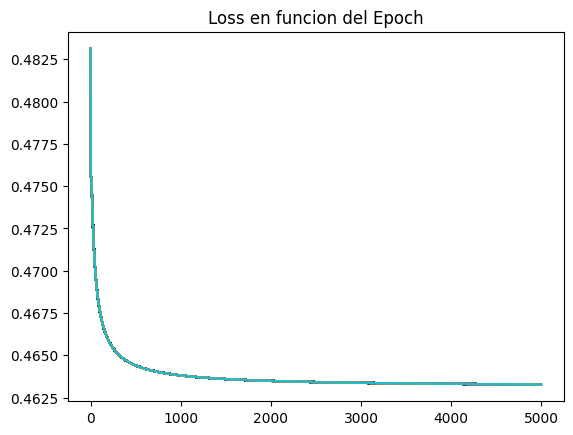

In [33]:
epoch = 5000

for i in range(epoch):
    t0 -= rho * delta_theta_0(y, x1, t0, t1)
    t1 -= rho * delta_theta_1(y, x1, t0, t1)
    
    t0_hat.append(t0)
    t1_hat.append(t1)
    
    loss = loss_fun(y, x1, t0, t1)
    error.append(loss)
    plt.plot(error)
plt.title("Loss en funcion del Epoch")

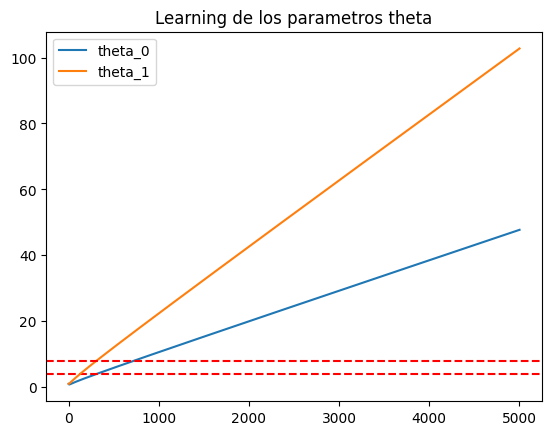

In [34]:
plt.plot(t0_hat, label = 'theta_0')
plt.axhline(y = theta_0, color='red', linestyle='--')

plt.plot(t1_hat, label = 'theta_1')
plt.axhline(y = theta_1, color='red', linestyle='--')

plt.title("Learning de los parametros theta")
plt.legend()

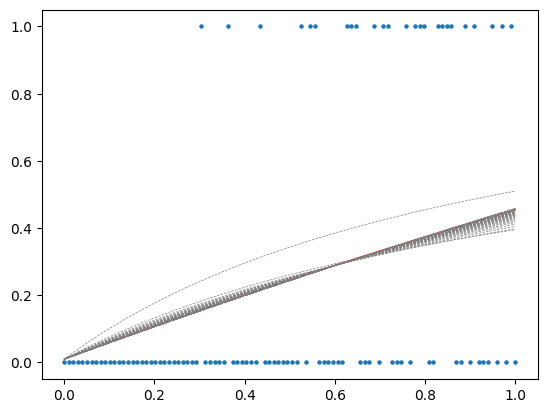

In [35]:
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(4, 8, x1), color='red', linewidth = 1)

for i in range(50):
    plt.plot(x1, y_hat(t0_hat[10*i], t1_hat[10*i], x1), color= 'gray', linewidth= .5, linestyle= '--')

Text(0, 0.5, 'theta_1')

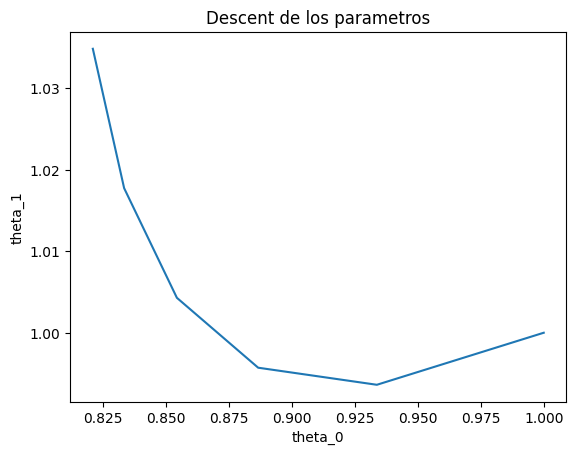

In [36]:
plt.plot(t0_hat[0:6], t1_hat[0:6])

plt.title("Descent de los parametros")
plt.xlabel('theta_0')
plt.ylabel('theta_1')